In [1]:
import pandas as fluff
import csv

song_parts = fluff.read_csv('songs_parts.csv',sep=',', encoding = "ISO-8859-1")

with open('song_chorus.csv', 'w') as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["id", "text"])
    for i in range(len(song_parts.index)):
        try:
            an_chorus = song_parts.loc[i, 'chorus']
            song_title = song_parts.loc[i, 'Song Title']
            sentiment_writer.writerow([song_title,an_chorus])
        except Exception as e:
            print(e)
            
with open('song_verse.csv', 'w') as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["id", "text"])
    for i in range(len(song_parts.index)):
        try:
            verse = song_parts.loc[i, 'verse']
            song_title = song_parts.loc[i, 'Song Title']
            sentiment_writer.writerow([song_title,verse])
        except Exception as e:
            print(e)



In [4]:
import pandas as pd
import csv
song_verse = pd.read_csv('song_verse.csv',error_bad_lines=False)
song_chorus = pd.read_csv('song_chorus.csv',error_bad_lines=False)
audio_features = pd.read_csv('audio_features.csv',error_bad_lines=False)
merged = pd.merge(audio_features,song_verse, how='left', on='Song Title')
merged = pd.merge(merged,song_chorus, how='left', on='Song Title')
merged.to_csv('merged.csv', index=False)


In [5]:
import json
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EmotionOptions
import pandas as pd
import csv
sp = pd.read_csv('merged.csv', sep=',', encoding = "ISO-8859-1")
chorus_part = sp.chorus


natural_language_understanding = NaturalLanguageUnderstandingV1(
  username='3e96f7e6-dd45-4207-a804-32e49f400be2',
  password='LmirYjWVQMr1',
  version='2017-02-27')

with open('sentiment_chorus.csv', 'w') as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["Artist", "Song Title", "sadness","joy","fear","disgust","anger"])
    for i in range(len(sp.index)):
        try:
            an_chorus = sp.loc[i, 'chorus']
            artist = sp.loc[i, 'Artist']
            song_title = sp.loc[i, 'Song Title']
            #try:
            response = natural_language_understanding.analyze(
                text= an_chorus,
                features=Features(
                emotion=EmotionOptions()))
            response = response['emotion']['document']
            print(response)
            #except Exception as e:
                #print('ERROR')
            sentiment_writer.writerow([artist, song_title, response['emotion']['sadness'],response['emotion']['joy'],response['emotion']['fear'],response['emotion']['disgust'],response['emotion']['anger']])
        except Exception as e:
            print(e)
            


{'emotion': {'sadness': 0.183425, 'joy': 0.773032, 'fear': 0.035934, 'disgust': 0.001244, 'anger': 0.014387}}
{'emotion': {'sadness': 0.132957, 'joy': 0.572446, 'fear': 0.377735, 'disgust': 0.002654, 'anger': 0.008717}}
{'emotion': {'sadness': 0.153447, 'joy': 0.328575, 'fear': 0.140589, 'disgust': 0.071614, 'anger': 0.12738}}
{'emotion': {'sadness': 0.548347, 'joy': 0.205348, 'fear': 0.044473, 'disgust': 0.097251, 'anger': 0.248512}}
{'emotion': {'sadness': 0.63191, 'joy': 0.012463, 'fear': 0.280514, 'disgust': 0.090544, 'anger': 0.252588}}
{'emotion': {'sadness': 0.108436, 'joy': 0.730176, 'fear': 0.068314, 'disgust': 0.037594, 'anger': 0.053366}}
{'emotion': {'sadness': 0.154045, 'joy': 0.209924, 'fear': 0.163634, 'disgust': 0.066356, 'anger': 0.120948}}
{'emotion': {'sadness': 0.609175, 'joy': 0.064401, 'fear': 0.069821, 'disgust': 0.168463, 'anger': 0.356413}}
{'emotion': {'sadness': 0.693173, 'joy': 0.022259, 'fear': 0.147759, 'disgust': 0.086962, 'anger': 0.364451}}
{'emotion': 

{'emotion': {'sadness': 0.209123, 'joy': 0.24983, 'fear': 0.576325, 'disgust': 0.021309, 'anger': 0.068941}}
{'emotion': {'sadness': 0.742598, 'joy': 0.013113, 'fear': 0.132119, 'disgust': 0.092184, 'anger': 0.321946}}
{'emotion': {'sadness': 0.540427, 'joy': 0.583269, 'fear': 0.172316, 'disgust': 0.107033, 'anger': 0.118476}}
{'emotion': {'sadness': 0.476197, 'joy': 0.223784, 'fear': 0.214965, 'disgust': 0.052506, 'anger': 0.107518}}
{'emotion': {'sadness': 0.267307, 'joy': 0.02988, 'fear': 0.100417, 'disgust': 0.010541, 'anger': 0.033069}}
{'emotion': {'sadness': 0.061936, 'joy': 0.104017, 'fear': 0.060835, 'disgust': 0.009525, 'anger': 0.045088}}
{'emotion': {'sadness': 0.720894, 'joy': 0.074478, 'fear': 0.210179, 'disgust': 0.128074, 'anger': 0.103155}}
{'emotion': {'sadness': 0.014814, 'joy': 0.567268, 'fear': 0.013416, 'disgust': 0.009428, 'anger': 0.024065}}
{'emotion': {'sadness': 0.097787, 'joy': 0.071019, 'fear': 0.13505, 'disgust': 0.468633, 'anger': 0.190046}}
{'emotion': {

{'emotion': {'sadness': 0.39094, 'joy': 0.504746, 'fear': 0.124454, 'disgust': 0.008171, 'anger': 0.061871}}
{'emotion': {'sadness': 0.095475, 'joy': 0.025074, 'fear': 0.08225, 'disgust': 0.459191, 'anger': 0.054818}}
{'emotion': {'sadness': 0.722164, 'joy': 0.008694, 'fear': 0.278267, 'disgust': 0.120152, 'anger': 0.202748}}
{'emotion': {'sadness': 0.481857, 'joy': 0.098255, 'fear': 0.109639, 'disgust': 0.067014, 'anger': 0.500851}}
{'emotion': {'sadness': 0.729459, 'joy': 0.175846, 'fear': 0.094251, 'disgust': 0.017878, 'anger': 0.05895}}
{'emotion': {'sadness': 0.239557, 'joy': 0.163917, 'fear': 0.304836, 'disgust': 0.202081, 'anger': 0.173261}}
{'emotion': {'sadness': 0.637931, 'joy': 0.022913, 'fear': 0.326318, 'disgust': 0.056625, 'anger': 0.272818}}
{'emotion': {'sadness': 0.394882, 'joy': 0.299906, 'fear': 0.072558, 'disgust': 0.127259, 'anger': 0.27965}}
{'emotion': {'sadness': 0.201531, 'joy': 0.529275, 'fear': 0.164457, 'disgust': 0.067845, 'anger': 0.107668}}
{'emotion': {'

In [6]:
ch = pd.read_csv('sentiment_chorus.csv', sep=',', encoding = "ISO-8859-1")
arr = ch.values
indexes = []
import operator
for i in arr:
    index, value = max(enumerate(i[2:7]), key=operator.itemgetter(1))
    indexes.append(index)

from collections import Counter
Counter(indexes)

Counter({0: 72, 1: 85, 2: 21, 3: 10, 4: 22})

In [3]:
import json
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EmotionOptions
import pandas as pd
import csv
sp = pd.read_csv('merged.csv', sep=',', encoding = "ISO-8859-1")
chorus_part = sp.verse

natural_language_understanding = NaturalLanguageUnderstandingV1(
  username='3e96f7e6-dd45-4207-a804-32e49f400be2',
  password='LmirYjWVQMr1',
  version='2017-02-27')

with open('sentiment_verse.csv', 'w') as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["Artist", "Song Title", "sadness","joy","fear","disgust","anger"])
    for i in range(len(sp.index)):
        try:
            an_verse = sp.loc[i, 'verse']
            artist = sp.loc[i, 'Artist']
            song_title = sp.loc[i, 'Song Title']
            #try:
            response = natural_language_understanding.analyze(
                text= an_verse,
                features=Features(
                emotion=EmotionOptions()))
            response = response['emotion']['document']
            print(response)
            #except Exception as e:
                #print('ERROR')
            sentiment_writer.writerow([artist, song_title, response['emotion']['sadness'],response['emotion']['joy'],response['emotion']['fear'],response['emotion']['disgust'],response['emotion']['anger']])
        except Exception as e:
            print(e)
            

{'emotion': {'sadness': 0.297842, 'joy': 0.643527, 'fear': 0.023434, 'disgust': 0.001863, 'anger': 0.058054}}
{'emotion': {'sadness': 0.403503, 'joy': 0.377848, 'fear': 0.154008, 'disgust': 0.15808, 'anger': 0.011867}}
{'emotion': {'sadness': 0.428785, 'joy': 0.416169, 'fear': 0.064478, 'disgust': 0.023707, 'anger': 0.171035}}
{'emotion': {'sadness': 0.061348, 'joy': 0.425657, 'fear': 0.467841, 'disgust': 0.13389, 'anger': 0.066499}}
{'emotion': {'sadness': 0.514236, 'joy': 0.050308, 'fear': 0.193708, 'disgust': 0.048115, 'anger': 0.143655}}
{'emotion': {'sadness': 0.486107, 'joy': 0.304272, 'fear': 0.234288, 'disgust': 0.021502, 'anger': 0.074984}}
{'emotion': {'sadness': 0.701646, 'joy': 0.062193, 'fear': 0.118404, 'disgust': 0.104477, 'anger': 0.240947}}
{'emotion': {'sadness': 0.515507, 'joy': 0.22886, 'fear': 0.133895, 'disgust': 0.168, 'anger': 0.118165}}
{'emotion': {'sadness': 0.210235, 'joy': 0.272624, 'fear': 0.149741, 'disgust': 0.153876, 'anger': 0.114252}}
{'emotion': {'sa

{'emotion': {'sadness': 0.065117, 'joy': 0.912893, 'fear': 0.012306, 'disgust': 0.002553, 'anger': 0.006147}}
{'emotion': {'sadness': 0.761584, 'joy': 0.011761, 'fear': 0.190084, 'disgust': 0.141059, 'anger': 0.20599}}
{'emotion': {'sadness': 0.743834, 'joy': 0.044061, 'fear': 0.274736, 'disgust': 0.063926, 'anger': 0.128341}}
{'emotion': {'sadness': 0.449842, 'joy': 0.302461, 'fear': 0.268298, 'disgust': 0.047476, 'anger': 0.081678}}
{'emotion': {'sadness': 0.602714, 'joy': 0.443604, 'fear': 0.734631, 'disgust': 0.076049, 'anger': 0.155717}}
{'emotion': {'sadness': 0.40222, 'joy': 0.155323, 'fear': 0.106365, 'disgust': 0.129934, 'anger': 0.430826}}
{'emotion': {'sadness': 0.779903, 'joy': 0.027967, 'fear': 0.323393, 'disgust': 0.053784, 'anger': 0.038872}}
{'emotion': {'sadness': 0.091363, 'joy': 0.584091, 'fear': 0.283291, 'disgust': 0.018138, 'anger': 0.009844}}
{'emotion': {'sadness': 0.111728, 'joy': 0.052887, 'fear': 0.313691, 'disgust': 0.475199, 'anger': 0.399097}}
{'emotion': 

{'emotion': {'sadness': 0.47012, 'joy': 0.455504, 'fear': 0.053662, 'disgust': 0.003529, 'anger': 0.091756}}
{'emotion': {'sadness': 0.184777, 'joy': 0.705497, 'fear': 0.049556, 'disgust': 0.016908, 'anger': 0.07537}}
{'emotion': {'sadness': 0.656801, 'joy': 0.042781, 'fear': 0.217052, 'disgust': 0.030587, 'anger': 0.334483}}
{'emotion': {'sadness': 0.296622, 'joy': 0.341396, 'fear': 0.111241, 'disgust': 0.219863, 'anger': 0.18903}}
{'emotion': {'sadness': 0.1544, 'joy': 0.64239, 'fear': 0.110089, 'disgust': 0.02365, 'anger': 0.114884}}
{'emotion': {'sadness': 0.506958, 'joy': 0.007341, 'fear': 0.555567, 'disgust': 0.070571, 'anger': 0.208263}}
{'emotion': {'sadness': 0.675372, 'joy': 0.117309, 'fear': 0.247215, 'disgust': 0.042176, 'anger': 0.152971}}
{'emotion': {'sadness': 0.322269, 'joy': 0.101365, 'fear': 0.19394, 'disgust': 0.284161, 'anger': 0.127133}}
{'emotion': {'sadness': 0.194958, 'joy': 0.693048, 'fear': 0.071702, 'disgust': 0.032273, 'anger': 0.040299}}
{'emotion': {'sadn

In [2]:

ch = pd.read_csv('sentiment_verse.csv', sep=',', encoding = "ISO-8859-1")
arr = ch.values
indexes = []
import operator
for i in arr:
    index, value = max(enumerate(i[2:7]), key=operator.itemgetter(1))
    indexes.append(index)

from collections import Counter
Counter(indexes)

Counter({0: 93, 1: 73, 2: 16, 3: 6, 4: 24})

In [2]:
import pandas as pd
import csv

ch = pd.read_csv('all_features.csv', sep=',', encoding = "ISO-8859-1")
arr = ch.Genre

from collections import Counter
Counter(arr)

Counter({1: 13,
         3: 45,
         4: 1,
         5: 1,
         6: 2,
         7: 1,
         8: 22,
         9: 9,
         10: 34,
         11: 3,
         12: 17,
         13: 4,
         14: 13,
         15: 5,
         16: 1,
         17: 4,
         18: 9,
         19: 13,
         20: 7,
         21: 2,
         22: 6})

In [81]:
#clustering 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lyrics = pd.read_csv('all_features.csv', sep=',', encoding = "ISO-8859-1")
X_lyrics = lyrics[['Tempo','Loudness','Energy','Genre', 'sadness_verse','joy_verse', 'fear_verse','disgust_verse','anger_verse','sadness_chorus', 'joy_chorus','fear_chorus', 'disgust_chorus','anger_chorus']].as_matrix()
X_lyrics

array([[ 8.64780e+01, -7.32000e+00,  7.36000e-01, ...,  3.59340e-02,
         1.24400e-03,  1.43870e-02],
       [ 1.18029e+02, -1.13330e+01,  6.61000e-01, ...,  3.77735e-01,
         2.65400e-03,  8.71700e-03],
       [ 1.42380e+02, -6.83200e+00,  8.77000e-01, ...,  1.40589e-01,
         7.16140e-02,  1.27380e-01],
       ...,
       [ 1.43529e+02, -1.12230e+01,  3.00000e-01, ...,  2.45088e-01,
         2.93748e-01,  1.36080e-01],
       [ 8.36370e+01, -8.61800e+00,  6.49000e-01, ...,  5.48770e-02,
         2.36930e-02,  5.13220e-02],
       [ 8.27310e+01, -8.22200e+00,  5.96000e-01, ...,  1.81086e-01,
         6.33500e-03,  6.81970e-02]])

In [148]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

data = X_lyrics

n_samples, n_features = data.shape
n_digits = 212
labels = kmeans.labels_

sample_size = 212

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

ValueError: labels_true and labels_pred must have same size, got 1797 and 212

In [101]:
sp = pd.read_csv('all_features.csv', sep=',', encoding = "ISO-8859-1")
gen = []
for i in arr_1:
    try:
        print(sp.loc[i, 'Artist'])
        print(sp.loc[i, 'Song Title'])
        #print(sp.loc[i, 'Tempo'])
        #print(sp.loc[i, 'Loudness'])
        #print(sp.loc[i, 'Energy'])
        print(sp.loc[i, 'Genre'])
        #print(sp.loc[i, 'joy_verse'])
        #print(sp.loc[i, 'fear_verse'])
        #print(sp.loc[i, 'disgust_verse'])
        #print(sp.loc[i, 'anger_verse'])
        #print(sp.loc[i, 'sadness_chorus'])
        #print(sp.loc[i, 'joy_chorus'])
        #print(sp.loc[i, 'fear_chorus'])
        #print(sp.loc[i, 'disgust_chorus'])
        #print(sp.loc[i, 'anger_chorus'])
        gen.append(sp.loc[i, 'Genre'])
    except Exception as e:
        print(e)

from collections import Counter
Counter(gen)  


Antonio Flores
Isla de Palma
5
Badfinger
Come On
3
Badfinger
Dennis
3
Badfinger
Just A Chance
3
Badfinger
Know One Knows
3
Badfinger
Three Time Loser
3
Billie Holiday
Gloomy Sunday
6
Chris Cornell
Before We Disappear
8
Chris Cornell
Higher Truth
8
Chris Cornell
Let Your Eyes Wander
8
Chris Cornell
Nearly Forgot My Broken Heart
8
Chris Cornell
Our Time In The Universe
8
Chris Cornell
Wrong Side
8
Del Shannon
Runaway
6
Donny Hathaway
Come Little Children
9
Donny Hathaway
Lord Help Me
9
Donny Hathaway
Magdalena
9
Elliott Smith
King's Crossing
10
Elliott Smith
Little One
10
Elliott Smith
Strung Out Again
10
Elliott Smith
The Last Hour
10
Elliott Smith
Twilight
10
Ephraim Lewis
Drowning in Your Eyes
11
Ephraim Lewis
Sad Song
11
Germs
American Leather
12
Germs
Communist Eyes
12
Germs
Dragon Lady
12
Germs
Land of Treason
12
Germs
Media Blitz
12
Germs
Our Way
12
Germs
Shut Down
12
Germs
Strange Notes
12
Germs
The Other Newest One
12
Germs
The Slave
12
Germs
What We Do Is Secret
12
Herman Brood

Counter({1: 2,
         3: 21,
         5: 1,
         6: 2,
         8: 11,
         9: 4,
         10: 17,
         11: 2,
         12: 11,
         13: 2,
         14: 4,
         15: 2,
         16: 1,
         17: 2,
         19: 7,
         20: 4,
         22: 2})

In [102]:
gen_2 = []
for i in arr_2:
    try:
        print(sp.loc[i, 'Artist'])
        print(sp.loc[i, 'Song Title'])
        #print(sp.loc[i, 'Tempo'])
        #print(sp.loc[i, 'Loudness'])
        #print(sp.loc[i, 'Energy'])
        print(sp.loc[i, 'Genre'])
        #print(sp.loc[i, 'joy_verse'])
        #print(sp.loc[i, 'fear_verse'])
        #print(sp.loc[i, 'disgust_verse'])
        #print(sp.loc[i, 'anger_verse'])
        #print(sp.loc[i, 'sadness_chorus'])
        #print(sp.loc[i, 'joy_chorus'])
        #print(sp.loc[i, 'fear_chorus'])
        #print(sp.loc[i, 'disgust_chorus'])
        #print(sp.loc[i, 'anger_chorus'])
        gen_2.append(sp.loc[i, 'Genre'])
    except Exception as e:
        print(e)

from collections import Counter
Counter(gen_2)  


Albert Ayler
Music is the Healing force of the Universe
4
Badfinger
Too Hung Up On You
3
Bob Brozman
The Lonesome Road
7
Chris Cornell
Dead Wishes
8
Chris Cornell
Josephine
8
Chris Cornell
Misery Chain
8
Chris Cornell
Murderer Of Blue Skies
8
Chris Cornell
Only These Words
8
Chris Cornell
Through The Window
8
Chris Cornell
Worried Moon
8
Donny Hathaway
I Love You More Than You'll Ever Know
9
Donny Hathaway
Love love love
9
Donny Hathaway
Someday We'll All Be Free
9
Elliott Smith
A Distorted Reality is Now a Necessity to be Free
10
Elliott Smith
A Passing Feeling
10
Elliott Smith
Coast To Coast
10
Elliott Smith
Let's Get Lost
10
Elliott Smith
Memory Lane
10
Elliott Smith
Pretty (Ugly Before)
10
Elliott Smith
Shooting Star
10
Ephraim Lewis
Mortal Seed
11
Germs
Let's Pretend
12
Germs
Lexicon Devil
12
Germs
Manimal
12
Germs
Richie Dagger's Crime
12
Germs
We Must Bleed
12
hide
Hurry go round
13
Jonghyun
#Hashtag
14
Jonghyun
Before Our Spring
14
Jonghyun
Im So Curious
14
Jonghyun
Just for a

Counter({1: 6,
         3: 16,
         4: 1,
         7: 1,
         8: 7,
         9: 3,
         10: 10,
         11: 1,
         12: 5,
         13: 1,
         14: 9,
         15: 3,
         18: 2,
         19: 5,
         20: 1,
         21: 1,
         22: 4})

In [77]:
#clustering with the highest emotion
import numpy as np
import pandas as pd

import csv
ch = pd.read_csv('all_features.csv', sep=',', encoding = "ISO-8859-1")
arr = ch.values
indexes = []
import operator
with open('maximum_emotion.csv', 'w') as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["Artist", "Song Title", "Tempo","Loudness","Energy","Genre","verse_emotion","chorus_emotion"])
    for i in range(len(ch.index)):
        index_verse, value_verse = max(enumerate(ch.loc[i][6:11]), key=operator.itemgetter(1))
        index_chorus, value_chorus = max(enumerate(ch.loc[i][11:16]), key=operator.itemgetter(1))
        sentiment_writer.writerow([ch.loc[i, 'Artist'],ch.loc[i, 'Song Title'],ch.loc[i, 'Tempo'],ch.loc[i, 'Loudness'],ch.loc[i, 'Energy'],ch.loc[i, 'Genre'],index_verse,index_chorus])

lyrics = pd.read_csv('maximum_emotion.csv', sep=',', encoding = "ISO-8859-1")
Y_lyrics = lyrics[['Tempo','Loudness','Energy','Genre', 'verse_emotion','chorus_emotion']].as_matrix()
Y_lyrics       



array([[ 86.478,  -7.32 ,   0.736,   4.   ,   1.   ,   1.   ],
       [118.029, -11.333,   0.661,   5.   ,   0.   ,   1.   ],
       [142.38 ,  -6.832,   0.877,   3.   ,   0.   ,   1.   ],
       ...,
       [143.529, -11.223,   0.3  ,  22.   ,   0.   ,   3.   ],
       [ 83.637,  -8.618,   0.649,  22.   ,   1.   ,   1.   ],
       [ 82.731,  -8.222,   0.596,  22.   ,   4.   ,   0.   ]])

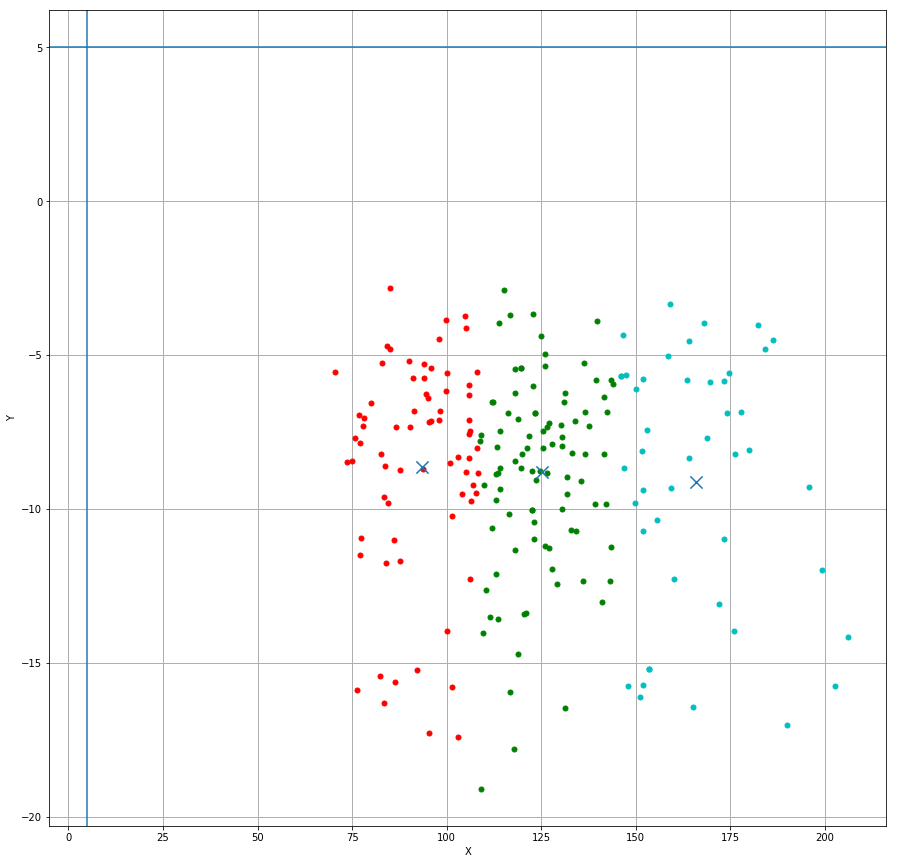

array([  6,  11,  12,  13,  28,  37,  51,  67,  68,  72,  89,  90,  91,
       113, 114, 118, 123, 128, 134, 145, 148, 149, 151, 152, 153, 158,
       159, 162, 163, 165, 166, 167, 169, 170, 171, 174, 180, 181, 187,
       189, 191, 195, 198, 199, 203, 204])

In [79]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt1

kmeans = KMeans(n_clusters=3, n_init = 15, algorithm="full")
kmeans.fit(Y_lyrics)
centroids = kmeans.cluster_centers_
labels1 = kmeans.labels_
colors = ["g.","r.","c.","y."]
plt1.figure(figsize=(15,15))
plt1.axvline(x=5)
plt1.axhline(y=5)
for i in range(len(Y_lyrics)):
    plt1.plot(Y_lyrics[i][0], Y_lyrics[i][1],colors[int(labels[i])], markersize =10)

plt1.xlabel("X")
plt1.ylabel("Y")
plt1.grid(linestyle='-', linewidth=1)
plt1.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt1.show()

arr_ = ClusterIndicesNumpy(1, labels1)

arr_



In [88]:
sp = pd.read_csv('maximum_emotion.csv', sep=',', encoding = "ISO-8859-1")
for i in arr_:
    try:
        print(sp.loc[i, 'Artist'])
        print(sp.loc[i, 'Song Title'])
        #print(sp.loc[i, 'Tempo'])
        #print(sp.loc[i, 'Loudness'])
        #print(sp.loc[i, 'Energy'])
        print(sp.loc[i, 'Genre'])
        #print(sp.loc[i, 'joy_verse'])
        #print(sp.loc[i, 'fear_verse'])
        #print(sp.loc[i, 'disgust_verse'])
        #print(sp.loc[i, 'anger_verse'])
        #print(sp.loc[i, 'sadness_chorus'])
        #print(sp.loc[i, 'joy_chorus'])
        #print(sp.loc[i, 'fear_chorus'])
        #print(sp.loc[i, 'disgust_chorus'])
        #print(sp.loc[i, 'anger_chorus'])
    except Exception as e:
        print(e)

Badfinger
Rock N' Roll Contract
3
Chris Cornell
Before We Disappear
8
Chris Cornell
Bend In The Road
8
Chris Cornell
Circling
8
Donny Hathaway
Flying Easy
9
Elliott Smith
Don't Go Down
10
Germs
Caught In My Eye
12
Gin Blossoms
Hey, Jealousy
10
Herman Brood
My Way
9
hide
Pink Spider
13
Joy Division
Heart and Soul
10
Joy Division
Isolation
10
Joy Division
Love Will Tear Us Apart
10
Linkin Park
Heavy (feat. Kiiara)
8
Material Issue
A Very Good Thing
1
Michael Hutchence
All I'm Saying
3
Michael Hutchence
Flesh and Blood
3
Michael Hutchence
She Flirts for England
3
Nick Drake
Road
3
Nirvana
Radio Friendly Unit Shifter
10
Nirvana
Tourette's
10
Nirvana
Very Ape
10
Owsley
Dirty Bird
1
Owsley
Down
1
Owsley
Dude
1
Owsley
Undone
1
Phil Ochs
Chords Of Fame
17
Phil Ochs
The Pleasures of the Harbor
17
Reagan Youth
(Are You) Happy
18
Reagan Youth
Degenerated
18
Reagan Youth
Go Nowhere
18
Reagan Youth
In Dog We Trust
18
Reagan Youth
No Class
18
Reagan Youth
Reagan Youth
18
Reagan Youth
USA
18
Sparkleh